In [1]:
## parameters for the QMSim simulation 
## mean of additive trait = 5.0 
## phenotypic variance = 1.0 
## heritability = 0.5
## chromosomes = 2 
## chromosome length = 100 cM
## QTL.each  = 15
## 1552, 1448 markers 
## MAF > 0.05
## QTL effects from a gamma distribution.shape = (0.4, 1.36)
## base pop = 100
## pop size final = 15800
## mutation rate = 0.000025 per gen for QTL and SNPS
## number of generations = 6
## all genotypes from generation 3,4
## 300 from gen 5
## total 1500 genotyped
## 10 replicates of the simulation

In [5]:
using StatsBase, Distributions, LinearAlgebra, XSim, JWAS, DataFrames, CSV, DelimitedFiles

In [211]:
#numChr,numLoci,chrLength,mutRate = 2,[1,2],[0.1,0.2],0.0
chrLength= 0.1  #length of each chromosome 
numChr   = 2    #number of chromosomes
nmarkers = 1500   #number of loci for each chromosome
nQTL     = 15    #number of QTL for each chromosomefects,mutRate);
mutRate = 0.000025
geneFreq = fill(0.5,nmarkers)
build_genome(numChr,chrLength,nmarkers,nQTL)

In [ ]:
# generate 4 generations

#generation 0
#generate founders
popSizeFounder = 100
sires = sampleFounders(popSizeFounder);
dams  = sampleFounders(popSizeFounder);

#random mating
ngen,popSize = 1,2800
sires1,dams1,gen1 = sampleRan(popSize, ngen, sires, dams);


ngen, popSize=1, 2800
sires2,dams2,gen2 = sampleRan(popSize, ngen, sires1, dams1);

ngen, popSize=1, 2800
sires3,dams3,gen3 = sampleRan(popSize, ngen, sires2, dams2);

ngen, popSize= 1, 2800
sires4,dams4,gen4 = sampleRan(popSize, ngen, sires3, dams3);


ngen, popSize = 1, 2800
sires5, dams5, gen5 = sampleRan(popSize, ngen, sires4, dams4);

# #collect the animals data 
animals5 = concatCohorts(sires5,dams5);
animals4 = concatCohorts(sires4, dams4);
animals3 = concatCohorts(sires3, dams3);
animals2 = concatCohorts(sires2, dams2);
animals1 = concatCohorts(sires1, dams1);
animals0 = concatCohorts(sires, dams);

#get genotypes
M5 = getOurGenotypes(animals5);
M4 = getOurGenotypes(animals4);
M3 = getOurGenotypes(animals3);

M = vcat(M3, M4, M5);

#get phenotypes
Phen5 = getOurPhenVals(animals5, 1.0);
Phen4 = getOurPhenVals(animals4, 1.0);
Phen3 = getOurPhenVals(animals3, 1.0);
Phen2 = getOurPhenVals(animals2, 1.0);
Phen1 = getOurPhenVals(animals1, 1.0);

Phen = vcat(Phen1, Phen2, Phen3, Phen4, Phen5);


#get pedigree
Ped5 = getPedigree(animals5);
Ped4 = getPedigree(animals4);
Ped3 = getPedigree(animals3);
Ped2 = getPedigree(animals2);
Ped1 = getPedigree(animals1)
Ped = vcat(Ped1, Ped2, Ped3, Ped4, Ped5);

#write out
Phenotypes = DataFrame();
Phenotypes[:y] = Phen;

In [30]:
CSV.write("../../XSim-data\\Phenotypes-ss14k.txt", Phenotypes)
writedlm("../../XSim-data\\Genotypes-ss14k.txt", M)
writedlm("../../XSim-data\\Pedigree-ss14k.txt", Ped)

In [43]:
Ped

14000×3 Array{Int64,2}:
 28601  28441  28569
 28602  28446  28596
 28603  28444  28563
 28604  28462  28529
 28605  28498  28516
 28606  28429  28552
 28607  28448  28600
 28608  28449  28555
 28609  28436  28561
 28610  28427  28537
 28611  28453  28534
 28612  28476  28518
 28613  28496  28527
     ⋮              
 42589  38120  39797
 42590  37209  39635
 42591  38394  39082
 42592  37337  38984
 42593  37788  38553
 42594  37469  38796
 42595  38106  39053
 42596  37649  39362
 42597  37827  39160
 42598  37118  38537
 42599  38353  38475
 42600  38036  38703

In [128]:
## Making training and test sets for Simulation: 70:30
## Make sure to conserve order in the concatenation

# ## pheno_setup
# # pheno training setup 
# pheno_train_ng = Phenotypes[1:4200, :];
# pheno_train_g = Phenotypes[5601:11200, :];
# pheno_train = vcat(pheno_train_ng, pheno_train_g);

# pheno testing setup
# pheno_test_ng = Phenotypes[4201:5600, :];
# pheno_test_g = Phenotypes[11201:14000, :];
# pheno_test = vcat(pheno_test_ng, pheno_test_g)

# ## geno_setup
# geno_train_g = M[1:5600, :]
# geno_test_g = M[5601:8400, :];

# ## Split pedigree file for extracting rowIDs for the simualtion 
# ## ped_training setup
# ped_train_ng = Ped[1:4200, :];
ped_train_g = Ped[5601:11200, :];
# ped_train = vcat(ped_train_ng, ped_train_g);

# ## ped_testing setup
# ped_test_ng = Ped[4201:5600, :];
# ped_test_g = Ped[11201:14000, :];
# ped_test = vcat(ped_test_ng, ped_test_g);


In [145]:
ped_train_g

5600×3 Array{Int64,2}:
 34201  32268  33047
 34202  31713  33148
 34203  31702  34139
 34204  32391  34119
 34205  31928  33164
 34206  32449  32951
 34207  32326  32802
 34208  32187  33921
 34209  32078  33949
 34210  32559  33711
 34211  32765  34093
 34212  31971  33736
 34213  32689  33746
     ⋮              
 39789  34450  36377
 39790  34783  36602
 39791  35313  35816
 39792  34997  36516
 39793  34336  36256
 39794  34311  35709
 39795  34402  36720
 39796  34243  36302
 39797  34230  36210
 39798  34840  36643
 39799  34653  36473
 39800  34987  35723

In [139]:
g_train = open("../../XSim-data\\15800_gtrain.txt", "w");
writedlm(g_train, geno_train_g);
close(g_train);


In [129]:
CSV.write("../../XSim-data\\15800_ptest.txt", pheno_test);


In [146]:
g_train_IDs = open("../../XSim-data\\15800_ped_train_g_rowID.txt", "w");
writedlm(g_train_IDs, ped_train_g);
close(g_train_IDs);


In [81]:
### write out training and test sets 
### TRAINING SETS ###
#####################
CSV.write("../../XSim-data\\15800_ptrain.txt", pheno_train);
#genotype training
g_train = open("../../XSim-data\\15800_gtrain.txt", "w");
writedlm(g_train, geno_train_g);
close(g_train);

#pedfile same as original ped file
#But rowIDs extract by ped_train and ped_test
ped_trainnn = open("../../XSim-data\\15800_ped_train_rowID.txt", "w");
writedlm(ped_trainnn, ped_train);
close(ped_trainnn);

### GENOTYPE ANIMALS IDS FROM PEDIGREE ###
g_train_IDs = open("../../XSim-data\\15800_ped_train_g_rowID.txt", "w");
writedlm(g_train_IDs, ped_train_g);
close(g_train_IDs);



### TESTING SETS ###
####################
CSV.write("../../XSim-data\\15800_ptest.txt", pheno_test);
##
g_test = open("../../XSim-data\\15800_gtest.txt", "w");
writedlm(g_test, geno_test);
close(g_test)
##
ped_testt = open("../../XSim-data\\15800_ped_test_rowID.txt", "w");
writedlm(ped_testt, ped_test);
close(ped_testt)



## Pre-Process XSIM Data for JWAS

In [31]:
using JWAS,JWAS.Datasets,DataFrames,CSV, LinearAlgebra, DelimitedFiles, Profile, ProfileView

In [143]:
#load input files from XSim
## STEPS:
## Build modeland genotypes using Pheno_train and geno_train
## OutputEBV for Pheno_test

# pheno_train = readdlm("../../XSim-data\\15800_ptrain.txt");
# pheno_test = readdlm("../../XSim-data\\15800_ptest.txt");
# geno_train = readdlm("../../XSim-data\\15800_gtrain.txt");
# pedfile = readdlm("../../XSim-data\\Pedigree-ss14k.txt");
# ped_train = readdlm("../../XSim-data\\15800_ped_train_rowID.txt");
# ped_test = readdlm("../../XSim-data\\15800_ped_test_rowID.txt");
geno_train_IDs = readdlm("../../XSim-data\\15800_ped_train_g_rowID.txt");

In [95]:
function ped_ssbr_convert_1(pedfile)
    ## pedfile input in only one format
    ped_Array = Array{String}(undef, 14001);
    ped_Array[1] = "ID,Sire,Dam";
    temp_arr = Array{String}(undef, 3)
    ## convert the pedigree array from Float64 to Int and append the header to the file
    ## For Pedigree file IDs, Sires and Dams must be string in format
    f = (x) -> Int(x);
    @time for i in 1:14000
        y = pedfile[i, :]
        y = f.(y)
        y = string(y)
        z = ""
        s = split(y, "")
        l = length(s)
        for j in 1:length(s)
            if j !== 1 && j !== length(s) && y[j] !== ' '
             z = z*y[j]
            end
        end
    # this converts "[1, 2, 3]" to "1, 2, 3"
        ped_Array[i + 1] = z
    end
    return ped_Array
end

ped_ssbr_convert_1 (generic function with 1 method)

In [96]:
ped_out_1 = ped_ssbr_convert_1(pedfile)

  0.304156 seconds (2.31 M allocations: 117.706 MiB, 16.74% gc time)


14001-element Array{String,1}:
 "ID,Sire,Dam"      
 "28601,28441,28569"
 "28602,28446,28596"
 "28603,28444,28563"
 "28604,28462,28529"
 "28605,28498,28516"
 "28606,28429,28552"
 "28607,28448,28600"
 "28608,28449,28555"
 "28609,28436,28561"
 "28610,28427,28537"
 "28611,28453,28534"
 "28612,28476,28518"
 ⋮                  
 "42589,38120,39797"
 "42590,37209,39635"
 "42591,38394,39082"
 "42592,37337,38984"
 "42593,37788,38553"
 "42594,37469,38796"
 "42595,38106,39053"
 "42596,37649,39362"
 "42597,37827,39160"
 "42598,37118,38537"
 "42599,38353,38475"
 "42600,38036,38703"

In [97]:
function ped_ssbr_append_char(ped_Array)
    ## split the file into components
    new_Arr = Array{String}(undef, 14001);
        
    for j in 2:14001
        x = split(string(ped_Array[j]), ",")
        x = "a" .* x
        #println(x)
        new_Arr[j] = x[1]*","*x[2]*","*x[3]
    end
    new_Arr[1] = "ID,sire,dam"
    return new_Arr
end

ped_ssbr_append_char (generic function with 1 method)

In [98]:
ped_out = ped_ssbr_append_char(ped_out_1)

14001-element Array{String,1}:
 "ID,sire,dam"         
 "a28601,a28441,a28569"
 "a28602,a28446,a28596"
 "a28603,a28444,a28563"
 "a28604,a28462,a28529"
 "a28605,a28498,a28516"
 "a28606,a28429,a28552"
 "a28607,a28448,a28600"
 "a28608,a28449,a28555"
 "a28609,a28436,a28561"
 "a28610,a28427,a28537"
 "a28611,a28453,a28534"
 "a28612,a28476,a28518"
 ⋮                     
 "a42589,a38120,a39797"
 "a42590,a37209,a39635"
 "a42591,a38394,a39082"
 "a42592,a37337,a38984"
 "a42593,a37788,a38553"
 "a42594,a37469,a38796"
 "a42595,a38106,a39053"
 "a42596,a37649,a39362"
 "a42597,a37827,a39160"
 "a42598,a37118,a38537"
 "a42599,a38353,a38475"
 "a42600,a38036,a38703"

In [195]:
## write out the pedigree file
ped_out_process = open("../../XSim-data\\Processed-XSim-Data\\pedigree_processed.txt", "w");
writedlm(ped_out_process, ped_out);
close(ped_out_process)

In [ ]:
### function row_IDs(phenofile, pedfile)
    no_rows = size(phenofile, 1) 
    rowIDs = Array{Any}(undef, no_rows+1);
    rowIDs[2:end] = pedfile[1:(no_rows), 1];
    rowIDs[1] = "ID";
    f = (x) -> Int(x);
    for i in 2:no_rows
        rowIDs[i] = f.(rowIDs[i])
    end

    for i in 2:no_rows
        rowIDs[i] = "a"*string(rowIDs[i])
    end
    iter_size = no_rows 
    return rowIDs[2:end]
end

In [132]:
## get rowIDs for phenotrain
# pheno_train_IDs = row_IDs(pheno_train, ped_train);
# pheno_train


## get rowIDs for phenotest 
pheno_test_IDs = row_IDs(pheno_test, ped_test);

In [133]:
pheno_test_IDs

4200-element Array{Any,1}:
 "a32801"
 "a32802"
 "a32803"
 "a32804"
 "a32805"
 "a32806"
 "a32807"
 "a32808"
 "a32809"
 "a32810"
 "a32811"
 "a32812"
 "a32813"
 ⋮       
 "a42589"
 "a42590"
 "a42591"
 "a42592"
 "a42593"
 "a42594"
 "a42595"
 "a42596"
 "a42597"
 "a42598"
 "a42599"
 "a42600"

In [134]:
###################################################################################
## Do similar conversion for genotypes except keep the values from 2:end - {Float}
## create a copy of the phenofile
## PHENOTYPE FILE FORMATTING
function pheno_ssbr_format(phenofile, rowIDs)
    #rowIDs = row_IDs(phenofile);
    pheno_copy = phenofile;

#     ## extract rowIDs and convert to Int 
#     rowIDs = Array{Any}(undef, 14001);
#     rowIDs[2:end] = pedfile[:, 1];
#     rowIDs[1] = "ID";
#     f = (x) -> Int(x);
#     for i in 2:14001
#         rowIDs[i] = f.(rowIDs[i])
#     end
    
# ## for Ids in phenotype, genotype and pedigree add a string "a"
#     for i in 2:14001
#         rowIDs[i] = "a"*string(rowIDs[i])
#     end
    
## concatenate the rowIDs
    pheno_cat = hcat(rowIDs, pheno_copy[2:end])
    pheno_array = Array{String}(undef, 4201)
    pheno_array[1] = "ID,y"
    for j in 2:4201
        m1 = pheno_cat[j-1, 2];
        m2 = string(m1);
        
        pheno_array[j] = pheno_cat[j-1, 1]*","*m2 
    end
    return pheno_array
end

pheno_ssbr_format (generic function with 2 methods)

In [ ]:
#pheno_train_processed = pheno_ssbr_format(pheno_train, pheno_train_IDs);
## write out pheno_train to output
pheno_train_process_out = open("../../XSim-data\\Processed-XSim-Data\\pheno_train_processed.txt", "w");
writedlm(pheno_train_process_out, pheno_train_processed);
close(pheno_train_process_out)

In [135]:
pheno_test_processed = pheno_ssbr_format(pheno_test, pheno_test_IDs);
## write out pheno_test to output for correlation
pheno_test_process_out = open("../../XSim-data\\Processed-XSim-Data\\pheno_test_processed.txt", "w");
writedlm(pheno_test_process_out, pheno_test_processed);
close(pheno_test_process_out)

In [187]:
new_rowIDs_gtrain

5600-element Array{String,1}:
 "a34201"
 "a34202"
 "a34203"
 "a34204"
 "a34205"
 "a34206"
 "a34207"
 "a34208"
 "a34209"
 "a34210"
 "a34211"
 "a34212"
 "a34213"
 ⋮       
 "a39789"
 "a39790"
 "a39791"
 "a39792"
 "a39793"
 "a39794"
 "a39795"
 "a39796"
 "a39797"
 "a39798"
 "a39799"
 "a39800"

In [188]:
 geno_copy = geno_train;
    #pedfile = readdlm("../../XSim-data\\15800_ped_train_rowID.txt");

    ## Add rowIDs(hcat) and marker IDs(vcat)
    ## extract rowIDs and convert to Int and then to string 
#     rowIDs = Array{Any}(undef, 5601);
#     rowIDs[2:end] = pedfile[1:5600, 1];
#     rowIDs[1] = "ID";
#     f = (x) -> Int(x);
#     for i in 2:5601
#         rowIDs[i] = f.(rowIDs[i])
#     end

#     f2 = (x) -> string(x);
#     for i in 2:1601
#         rowIDs[i] = f2.(rowIDs[i])
#     end
#     for i in 1:length(rowIDs)
#         rowIDs[i] = "a"*string(rowIDs[i])
#     end
    
    ## hcat rowIDs
    geno_cat1 = Array{Any}(5601, 3001);
    geno_cat1[2:5601, :] = hcat(new_rowIDs_gtrain, geno_copy)


┌ Warning: `Array{T}(m::Int, n::Int) where T` is deprecated, use `Array{T}(undef, m, n)` instead.
│   caller = top-level scope at In[188]:2
└ @ Core In[188]:2


5600×3001 Array{Any,2}:
 "a34201"  1.0  1.0  1.0  1.0  0.0  1.0  …  1.0  1.0  1.0  2.0  1.0  0.0  0.0
 "a34202"  0.0  0.0  1.0  1.0  1.0  2.0     1.0  0.0  0.0  2.0  2.0  2.0  0.0
 "a34203"  0.0  2.0  2.0  1.0  2.0  0.0     0.0  1.0  2.0  2.0  1.0  2.0  1.0
 "a34204"  0.0  0.0  1.0  1.0  1.0  1.0     0.0  1.0  2.0  2.0  0.0  1.0  2.0
 "a34205"  0.0  0.0  0.0  2.0  1.0  2.0     2.0  1.0  1.0  0.0  1.0  0.0  2.0
 "a34206"  0.0  1.0  1.0  0.0  2.0  1.0  …  2.0  1.0  2.0  1.0  1.0  0.0  2.0
 "a34207"  1.0  1.0  0.0  1.0  0.0  2.0     1.0  0.0  1.0  2.0  1.0  1.0  1.0
 "a34208"  1.0  0.0  1.0  0.0  1.0  1.0     1.0  1.0  1.0  0.0  2.0  1.0  0.0
 "a34209"  1.0  1.0  1.0  1.0  0.0  1.0     2.0  1.0  0.0  1.0  0.0  1.0  2.0
 "a34210"  1.0  2.0  1.0  0.0  1.0  0.0     0.0  1.0  1.0  1.0  0.0  2.0  1.0
 "a34211"  2.0  1.0  1.0  2.0  2.0  1.0  …  1.0  1.0  1.0  0.0  2.0  1.0  1.0
 "a34212"  1.0  2.0  0.0  2.0  1.0  1.0     2.0  1.0  0.0  1.0  1.0  1.0  1.0
 "a34213"  1.0  2.0  1.0  1.0  2.0  2.0 

In [189]:
#################################################################################
## GENOTYPE FILE FORMATTING
## use the genotype file and do same transformation for genotypes
## genotype script 
function geno_ssbr_format(genofile, rowIDs)
    geno_copy = genofile;
    #pedfile = readdlm("../../XSim-data\\15800_ped_train_rowID.txt");

    ## Add rowIDs(hcat) and marker IDs(vcat)
    ## extract rowIDs and convert to Int and then to string 
#     rowIDs = Array{Any}(undef, 5601);
#     rowIDs[2:end] = pedfile[1:5600, 1];
#     rowIDs[1] = "ID";
#     f = (x) -> Int(x);
#     for i in 2:5601
#         rowIDs[i] = f.(rowIDs[i])
#     end

#     f2 = (x) -> string(x);
#     for i in 2:1601
#         rowIDs[i] = f2.(rowIDs[i])
#     end
#     for i in 1:length(rowIDs)
#         rowIDs[i] = "a"*string(rowIDs[i])
#     end
    
    ## hcat rowIDs
    geno_cat1 = Array{Any}(5601, 3001);
    geno_cat1[2:5601, :] = hcat(rowIDs, geno_copy)
    println("genotype file concatenated with ID's: ", "a1, 1, 0, 2")
    
    ## add markerIDs and vcat
    empty_l = Array{String}(undef, 3000)
    empty_l[1] = "ID"
    empty_l[2:3000] = repeat(["m"], 2999)

    for i in 2:3000
        empty_l[i] = empty_l[i] * "$(i-1)"
    end
    
    len = 2999
    println("$len markerIDs created")
    ## Header split for genotype file
    H_split = ""
    for j in 1:3000
        H_split = H_split*empty_l[j]        
        if j == 3000
            H_split = H_split
        else
            H_split = H_split*","
        end
    end
    println("markerIDs split into:", "ID, m1, m2, m3", H_split )
    ## return the H_split for 1st column of geno_formatted
    
    
    ## Main split for genotype file 
    ## Main Split
    ## convert the float to Int and then string split 
    f = x -> Int(x);
    geno_string = Array{String}(undef, 5601);
    @time for j in 2:5601
        v = geno_cat1[j, 2:end]
        #println(v)
        v = f.(v)
        v = string(v)
        v = split(v, "")
        len = length(v)
        z = ""
        #println(v)
        for i in 1:len
            if i !== 1 && i !== 2 && i !== 3 && i !== len
                z = z*v[i]
            end
        end
        #println(z)
#         geno_string[j] = string(rowIDs[j])
#         #println(geno_string[j])
#         geno_string[j] = geno_string[j]*","*z
#         #println(geno_string[j])
        geno_string[j] = rowIDs[j-1]*","*z
    end
    println("Matrix split into", "a1, 0, 1, 2")
    geno_string[1] = H_split
    return  geno_string
end

geno_ssbr_format (generic function with 2 methods)

In [185]:
#geno_train_IDs
rowIDs_geno_train_g = geno_train_IDs[:, 1];
f1 = (x) -> Int(x);    
rowIDs_geno_train_g = f1.(rowIDs_geno_train_g)
# for i in 1:size(geno_train_IDs, 1)
#          rowIDs_geno_train_g[i] = f1.(rowIDs_geno_train_g[i])
# end
new_rowIDs_gtrain = Array{String}(undef, size(rowIDs_geno_train_g))
for i in 1:size(geno_train_IDs, 1)
    new_rowIDs_gtrain[i] = "a"*string(rowIDs_geno_train_g[i])
end
    

In [186]:
new_rowIDs_gtrain 

5600-element Array{String,1}:
 "a34201"
 "a34202"
 "a34203"
 "a34204"
 "a34205"
 "a34206"
 "a34207"
 "a34208"
 "a34209"
 "a34210"
 "a34211"
 "a34212"
 "a34213"
 ⋮       
 "a39789"
 "a39790"
 "a39791"
 "a39792"
 "a39793"
 "a39794"
 "a39795"
 "a39796"
 "a39797"
 "a39798"
 "a39799"
 "a39800"

In [148]:
geno_train_IDs

5600×3 Array{Float64,2}:
 34201.0  32268.0  33047.0
 34202.0  31713.0  33148.0
 34203.0  31702.0  34139.0
 34204.0  32391.0  34119.0
 34205.0  31928.0  33164.0
 34206.0  32449.0  32951.0
 34207.0  32326.0  32802.0
 34208.0  32187.0  33921.0
 34209.0  32078.0  33949.0
 34210.0  32559.0  33711.0
 34211.0  32765.0  34093.0
 34212.0  31971.0  33736.0
 34213.0  32689.0  33746.0
     ⋮                    
 39789.0  34450.0  36377.0
 39790.0  34783.0  36602.0
 39791.0  35313.0  35816.0
 39792.0  34997.0  36516.0
 39793.0  34336.0  36256.0
 39794.0  34311.0  35709.0
 39795.0  34402.0  36720.0
 39796.0  34243.0  36302.0
 39797.0  34230.0  36210.0
 39798.0  34840.0  36643.0
 39799.0  34653.0  36473.0
 39800.0  34987.0  35723.0

In [177]:
geno_train

5600×3000 Array{Float64,2}:
 1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  …  1.0  1.0  1.0  2.0  1.0  0.0  0.0
 0.0  0.0  1.0  1.0  1.0  2.0  1.0  2.0     1.0  0.0  0.0  2.0  2.0  2.0  0.0
 0.0  2.0  2.0  1.0  2.0  0.0  1.0  0.0     0.0  1.0  2.0  2.0  1.0  2.0  1.0
 0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0     0.0  1.0  2.0  2.0  0.0  1.0  2.0
 0.0  0.0  0.0  2.0  1.0  2.0  0.0  0.0     2.0  1.0  1.0  0.0  1.0  0.0  2.0
 0.0  1.0  1.0  0.0  2.0  1.0  2.0  1.0  …  2.0  1.0  2.0  1.0  1.0  0.0  2.0
 1.0  1.0  0.0  1.0  0.0  2.0  0.0  2.0     1.0  0.0  1.0  2.0  1.0  1.0  1.0
 1.0  0.0  1.0  0.0  1.0  1.0  2.0  2.0     1.0  1.0  1.0  0.0  2.0  1.0  0.0
 1.0  1.0  1.0  1.0  0.0  1.0  1.0  2.0     2.0  1.0  0.0  1.0  0.0  1.0  2.0
 1.0  2.0  1.0  0.0  1.0  0.0  0.0  0.0     0.0  1.0  1.0  1.0  0.0  2.0  1.0
 2.0  1.0  1.0  2.0  2.0  1.0  1.0  2.0  …  1.0  1.0  1.0  0.0  2.0  1.0  1.0
 1.0  2.0  0.0  2.0  1.0  1.0  2.0  2.0     2.0  1.0  0.0  1.0  1.0  1.0  1.0
 1.0  2.0  1.0  1.0  2.0  2.0  1.0  

In [190]:
geno_test1 = geno_ssbr_format(geno_train, new_rowIDs_gtrain)

genotype file concatenated with ID's: a1, 1, 0, 2
2999 markerIDs created
markerIDs split into:ID, m1, m2, m3ID,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m48,m49,m50,m51,m52,m53,m54,m55,m56,m57,m58,m59,m60,m61,m62,m63,m64,m65,m66,m67,m68,m69,m70,m71,m72,m73,m74,m75,m76,m77,m78,m79,m80,m81,m82,m83,m84,m85,m86,m87,m88,m89,m90,m91,m92,m93,m94,m95,m96,m97,m98,m99,m100,m101,m102,m103,m104,m105,m106,m107,m108,m109,m110,m111,m112,m113,m114,m115,m116,m117,m118,m119,m120,m121,m122,m123,m124,m125,m126,m127,m128,m129,m130,m131,m132,m133,m134,m135,m136,m137,m138,m139,m140,m141,m142,m143,m144,m145,m146,m147,m148,m149,m150,m151,m152,m153,m154,m155,m156,m157,m158,m159,m160,m161,m162,m163,m164,m165,m166,m167,m168,m169,m170,m171,m172,m173,m174,m175,m176,m177,m178,m179,m180,m181,m182,m183,m184,m185,m186,m187,m188,m189,m190,m191,m192,m193,m194,m195,m196,m197,m198,m199,m2

┌ Warning: `Array{T}(m::Int, n::Int) where T` is deprecated, use `Array{T}(undef, m, n)` instead.
│   caller = geno_ssbr_format(::Array{Float64,2}, ::Array{String,1}) at In[189]:28
└ @ Main .\In[189]:28


130.184436 seconds (296.99 M allocations: 227.317 GiB, 38.67% gc time)
Matrix split intoa1, 0, 1, 2


5601-element Array{String,1}:
 "ID,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m48,m49,m50,m51,m52,m53,m54,m55,m56,m57,m58,m59,m60,m61,m62,m63,m64,m65,m66,m67,m68,m69,m70,m71,m72,m73,m74,m75,m76,m77,m78,m79,m80,m81,m82,m83,m84,m85,m86,m87,m88,m89,m90,m91,m92,m93,m94,m95,m96,m97,m98,m99,m100,m101,m102,m103,m104,m105,m106,m107,m108,m109,m110,m111,m112,m113,m114,m115,m116,m117,m118,m119,m120,m121,m122,m123,m124,m125,m126,m127,m128,m129,m130,m131,m132,m133,m134,m135,m136,m137,m138,m139,m140,m141,m142,m143,m144,m145,m146,m147,m148,m149,m150,m151,m152,m153,m154,m155,m156,m157,m158,m159,m160,m161,m162,m163,m164,m165,m166,m167,m168,m169,m170,m171,m172,m173,m174,m175,m176,m177,m178,m179,m180,m181,m182,m183,m184,m185,m186,m187,m188,m189,m190,m191,m192,m193,m194,m195,m196,m197,m198,m199,m200,m201,m202,m203,m204,m205,m206,m207,m208,m209,m210,m211,m212,m213,m214,m21

In [192]:
### write out files
geno_name = open("../../XSim-data\\Processed-XSim-Data\\15800_geno_training_processed.txt", "w");
writedlm(geno_name, geno_test1)
close(geno_name)


In [40]:
function row_IDs(phenofile, pedfile)
    no_rows = size(phenofile, 1) 
    rowIDs = Array{Any}(undef, no_rows);
    rowIDs[2:end] = pedfile[1:(no_rows-1), 1];
    rowIDs[1] = "ID";
    f = (x) -> Int(x);
    for i in 2:no_rows
        rowIDs[i] = f.(rowIDs[i])
    end

    for i in 2:no_rows
        rowIDs[i] = "a"*string(rowIDs[i])
    end
    iter_size = no_rows 
    return rowIDs[2:end]
end

row_IDs (generic function with 1 method)

In [41]:
obs_ID = row_IDs(phenofile, pedfile)

14000-element Array{Any,1}:
 "a28601"
 "a28602"
 "a28603"
 "a28604"
 "a28605"
 "a28606"
 "a28607"
 "a28608"
 "a28609"
 "a28610"
 "a28611"
 "a28612"
 "a28613"
 ⋮       
 "a42589"
 "a42590"
 "a42591"
 "a42592"
 "a42593"
 "a42594"
 "a42595"
 "a42596"
 "a42597"
 "a42598"
 "a42599"
 "a42600"

## SSBR Simulation with 8400 genotypes, 14000 phenotypes and 14000 pedigree

In [196]:
### Load training data for model training 
### Generate/Build model on phenotrain with 5600 genotypes 
### Predict EBV for phenotest with 2400 genotypes
using JWAS,JWAS.Datasets,DataFrames,CSV, LinearAlgebra

phenofile  = "../../XSim-data\\Processed-XSim-Data\\pheno_train_processed.txt" #Datasets.dataset("example","phenotypes_ssbr.txt")
pedfile    = "../../XSim-data\\Processed-XSim-Data\\pedigree_processed.txt" #Datasets.dataset("example","pedigree.txt")
genofile   = "../../XSim-data\\Processed-XSim-Data\\15800_geno_training_processed.txt"#Datasets.dataset("example","genotypes.txt")

phenotypes = CSV.read(phenofile,delim = ',',header=true)
#phenotypes = phenotypes[1:1200, :]
pedigree   = get_pedigree(pedfile,separator=",",header=true);


coding pedigree... 100%|████████████████████████████████| Time: 0:00:00
calculating inbreeding...  61%|████████████████         |  ETA: 0:00:00

Finished!


calculating inbreeding... 100%|█████████████████████████| Time: 0:00:01


In [197]:
model_equation1  ="y = intercept";

R      = 1.0
model1 = build_model(model_equation1,R);

In [198]:
G3 =1.0
add_genotypes(model1,genofile,G3,separator=',');

outputEBV(model1, pheno_test_IDs);
outputMCMCsamples(model1)
out2=runMCMC(model1,Pi=0.95,estimatePi=true,phenotypes,methods="BayesC",single_step_analysis=true,
    pedigree=pedigree,chain_length=50000,output_samples_frequency=100,outputEBV=true);

keys(out2)

#out2["EBV_y_2"]

#out2["Posterior mean of marker effects"]

┌ Warning: readtable is deprecated, use CSV.read from the CSV package instead
│   caller = ip:0x0
└ @ Core :-1
┌ Warning: `convert(::Type{Array}, df::AbstractDataFrame)` is deprecated, use `convert(Matrix, df)` instead.
│   caller = #readgenotypes#41(::Char, ::Bool, ::Bool, ::Bool, ::Function, ::String) at readgenotypes.jl:24
└ @ JWAS C:\Users\adhal\.julia\packages\JWAS\lHJID\src\1.JWAS\src\markers\readgenotypes.jl:24


2999 markers on 5600 individuals were added.

The prior for marker effects variance is calculated from the genetic variance and π. The mean of the prior for the marker effects variance is: 0.013379


A Linear Mixed Model was build using model equations:

y = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
ϵ               factor       random            8600
J               covariate    fixed                1

MCMC Information:

methods                                      BayesC
chain_length                                  50000
burnin                                            0
estimatePi                                     true
starting_value                                false
printout_frequency                            50001
output_samples_frequency                        100
constraint                                    false
missing_phenotypes                            false
update_priors_

running MCMC for BayesC...100%|█████████████████████████| Time: 0:23:37


Base.KeySet for a Dict{Any,Any} with 6 entries. Keys:
  "Posterior mean of marker effects"
  "EBV_y"
  "Posterior mean of residual variance"
  "Posterior mean of marker effects variance"
  "Posterior mean of location parameters"
  "Posterior mean of Pi"

In [200]:
## load phenotest and calculate correlation
y_actual = pheno_test 

4201×1 Array{Any,2}:
    "y"              
  -9.249609125278843 
 -11.29666010242732  
  -6.356423302369954 
  -3.0804863056042664
  -8.730497522077474 
  -1.0385259670915676
  -1.5270140599021378
   1.7314764487108596
  -6.093430035526673 
   0.6194970752428013
  -6.117788722843973 
 -12.69532969106453  
   ⋮                 
  -6.288885299511561 
   2.7226884109505853
  -8.721235637251167 
  -2.4988176715463264
  -4.651464202131853 
   2.4824960215363108
  -1.5918268467616146
  -6.77593022380745  
  -1.6205105565866575
  -5.874913136962896 
  -2.7296659444951974
  -3.8702702367175488

In [202]:
y_pred = out2["EBV_y"][:, 2]

4200-element Array{Any,1}:
 -0.6819225119987302 
 -1.7975823043748214 
 -1.8229375182590948 
 -0.3691929147537627 
 -5.720183107362952  
  1.7486381772607196 
 -5.69177854864324   
 -1.2815732760513896 
 -0.6755668712769869 
 -1.9551689467270534 
 -2.8755503872687296 
 -8.424306250846271  
 -6.539851876495827  
  ⋮                  
 -2.4057173954411155 
  1.6665071705279855 
 -5.087523197070185  
  1.2194940290978993 
 -1.63664835604904   
  0.8205386764144222 
  1.3011252474066042 
 -2.700700528917298  
 -0.10369727341581392
 -1.5249837099032209 
 -2.944592796066588  
 -5.91005617366528   

In [204]:
## calculate correlation
using Statistics, Plots

In [208]:
cor_test1 = cor(y_actual[2:end], y_pred)

0.7084635148631989

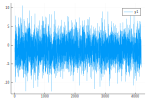

In [209]:
p1 = plot(collect(1:4200), y_pred)

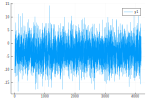

In [210]:
p2 = plot(collect(1:4200), y_actual[2:end])